In [599]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [787]:
data = pd.read_csv('./DATA/data_estia_bihar_passagers.csv', parse_dates=['dateTime'])
data2 = pd.read_csv('./DATA/data_passagers.csv', parse_dates=['dateTime'])

In [792]:
data2.column

,dateTime,weather,lineNumber,passengersNumber,lineType
0,2019-04-05,26,29,3032,daily
1,2019-04-05,26,42,418,daily
2,2019-04-05,26,40,2065,daily
3,2019-04-05,26,104,115,night
4,2019-04-05,26,27,2900,daily
...,...,...,...,...,...
37616,2023-03-19,26,26,2650,daily
37617,2023-03-19,26,31,905,daily
37618,2023-03-19,26,36,425,daily
37619,2023-03-19,26,41,273,daily


# DATA PREPROCESSING

In [800]:
# data2 = data2.rename(columns={'lineNumber': 'line'})
data2.sort_values(by="dateTime", inplace=True)
data2 = data2.set_index('dateTime')


In [602]:
# selction 
# data = data[data.dateTime<"2020-03-08"]
#sort data by dateTime column
data.sort_values(by="dateTime", inplace=True)
# set datetime as index 
data = data.set_index('dateTime')



In [801]:
data2.tail()

,weather,line,passengersNumber,lineType
dateTime,,,,
2023-03-19,26,13,6060,daily
2023-03-19,26,6,21,daily
2023-03-19,26,41,273,daily
2023-03-19,26,27,678,daily
2023-03-19,26,46,130,daily


In [802]:
a = data2[['line']].value_counts()
a

line
5       1187
26      1187
8       1187
9       1187
13      1187
14      1187
16      1187
37      1187
18      1187
19      1187
36      1187
35      1187
28      1187
25      1187
32      1186
6       1182
17      1168
29      1157
33      1155
45      1138
31      1126
42      1103
21      1103
38      1103
23      1095
24      1094
27      1094
41      1094
46      1068
40       828
43       634
101      337
102      337
103      337
104      337
106      337
108      330
109      330
110      330
dtype: int64

In [803]:
data2.describe(include='all')

,weather,line,passengersNumber,lineType
count,37621.000000,37621.000000,37621.000000,37621
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,daily
freq,NaN,NaN,NaN,34946
mean,24.010579,31.744903,2067.940990,NaN
std,11.734847,23.335248,2494.733418,NaN
min,11.000000,5.000000,1.000000,NaN
25%,13.000000,17.000000,365.000000,NaN
50%,24.000000,28.000000,1241.000000,NaN
75%,26.000000,38.000000,2558.000000,NaN


## Nombre de 

In [804]:
print("nombre de ligne de bus", len(a))

bus_line = data2.line.unique()

nombre de ligne de bus 39


In [805]:
data2.loc[data2['passengersNumber'] ==0.0]

,weather,line,passengersNumber,lineType
dateTime,,,,


In [806]:
data2[['lineType', 'line']].groupby('lineType').nunique()

,line
lineType,
daily,31
night,8


## Graphisme


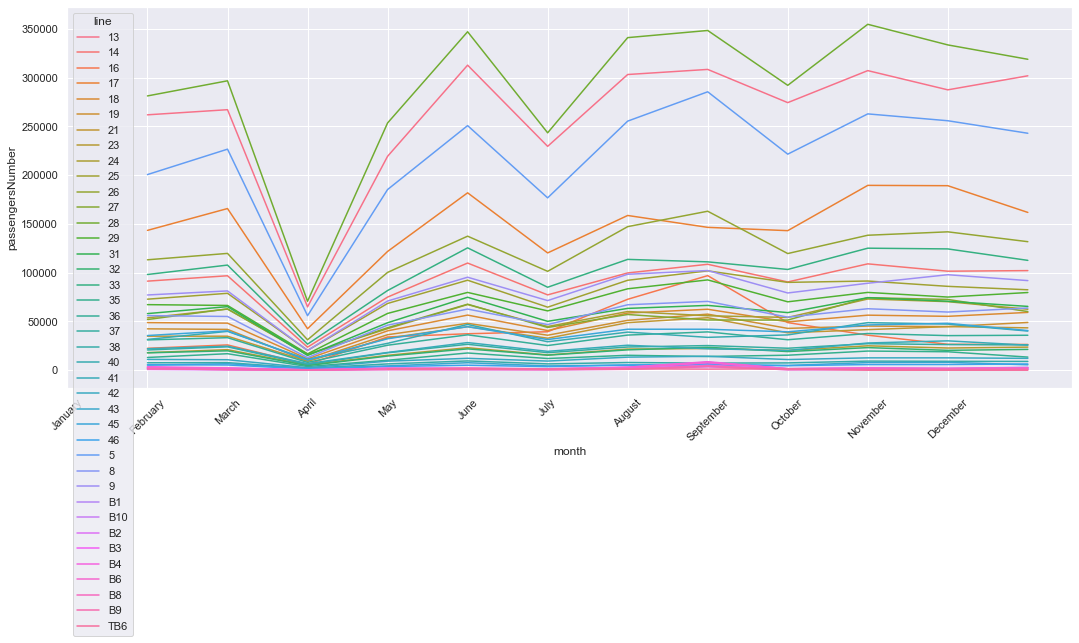

In [807]:

import calendar
# reate a new column with month information
data2["month"] = data2.index.month

# get unique values in the "line" column
lines = data2["line"].unique()

# group the data2 by month and line
data2_mont = data2.groupby(["month", "line"]).sum().reset_index()

plt.figure(figsize=(18,7))
sns.lineplot(data=data_mont, x="month", y="passengersNumber", hue="line")
plt.xticks(range(12), calendar.month_name[1:13], rotation=45)
plt.show()

In [818]:
data2

,weather,line,passengersNumber,lineType,month
dateTime,,,,,
2019-04-05,26,29,3032,daily,4
2019-04-05,26,33,4880,daily,4
2019-04-05,26,16,1000,daily,4
2019-04-05,26,14,4355,daily,4
2019-04-05,26,109,36,night,4
...,...,...,...,...,...
2023-03-19,26,13,6060,daily,3
2023-03-19,26,6,21,daily,3
2023-03-19,26,41,273,daily,3


In [816]:
import plotly.graph_objects as go

In [819]:
fig = go.Figure()

for line in data2.line.unique() :
  data_resample = data2[data2.line == line].resample('3D').mean() 

  # Create a Plotly figure with a line trace
  fig.add_trace(go.Scatter(x=data_resample.index, y=data_resample['passengersNumber'], mode='lines', name="line " + str(line)))

# Customize the plot layout
fig.update_layout(title='Sum on 3 consecutives Days - Total passengers (hue by bus lines)', xaxis_title='each 3 days', yaxis_title='# of passengers')

# Show the plot
fig.show()

## Stationarity

In [808]:
rolling_mean = data_mont.passengersNumber.rolling(7).mean()
rolling_std = data_mont.passengersNumber.rolling(7).std()

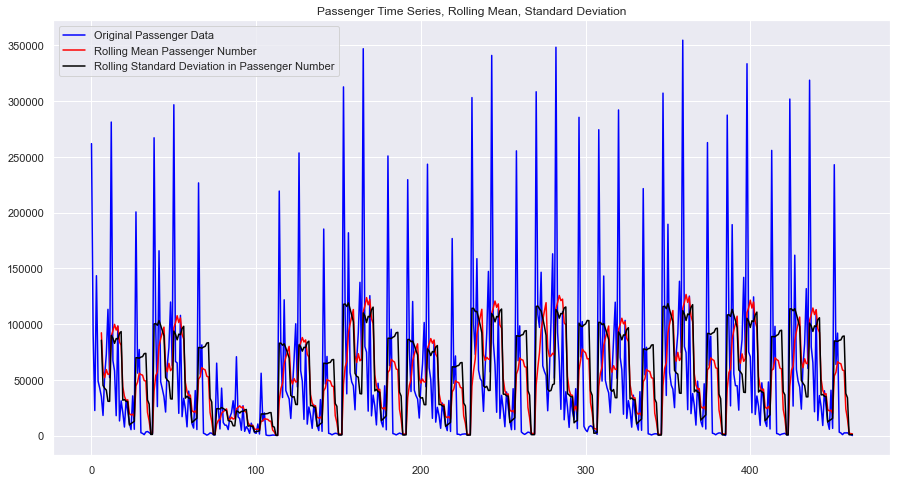

In [821]:
plt.figure(figsize=(15,8))

plt.plot(data_mont.passengersNumber, color="blue",label="Original Passenger Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")


la moyenne et l'ecart type varie au cours du temps, nous pouvons dire que nos donnée ne sont pas stationnaire et présente 
des fluctuation


### auto correlation

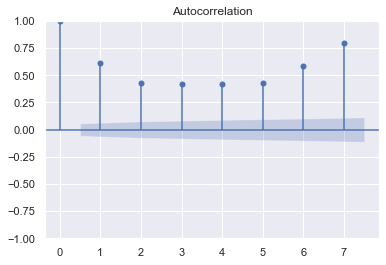

In [820]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data2[data2.line==5]['passengersNumber'], lags=7)
plt.show()

In [822]:
bus_lines = data2['line'].unique()
autocorr_dict = {}
for line in bus_lines:
    line_data2 = data2[data2['line'] == line]['passengersNumber']
    autocorr_lag7 = line_data.autocorr(lag=12)
    autocorr_dict[line] = autocorr_lag7


In [840]:

import statsmodels.api as sm

bus_lines = data['line'].unique()
autocorr_dict = {}
for line in bus_lines:
    line_data = data.loc[data['line'] == line, 'passengersNumber']
    autocorr_lag7 = line_data.autocorr(lag=7)
    autocorr_dict[line] = autocorr_lag7

In [841]:
autocorr_dict

{'42': 0.9404868689130859,
 '16': 0.9312050430581058,
 'B6': 0.4717483681121181,
 '29': 0.9135365027340205,
 '25': 0.9001205016197596,
 '40': 0.9007006704272711,
 '24': 0.9194117313308744,
 '46': 0.9457433169400257,
 'B8': 0.41552017932657537,
 '41': 0.9396668355429673,
 '17': 0.798043295542556,
 '33': 0.8828060668470257,
 '45': 0.9309011198308066,
 '23': 0.9404707797141766,
 'B9': 0.4011527440385365,
 '18': 0.9245004138110229,
 '21': 0.9294367638125347,
 '43': 0.9205092253943357,
 '9': 0.9056276871831266,
 '31': 0.9215632701470562,
 '32': 0.9384756932369194,
 'TB6': 0.8010160618280138,
 '38': 0.944830956450948,
 '19': 0.9307956157783434,
 'B2': 0.34962777253644506,
 '26': 0.8549279710107162,
 '35': 0.9410482453459055,
 'B1': 0.4182395271454009,
 '14': 0.8926500671942321,
 '36': 0.935854087858589,
 '37': 0.9398472797037035,
 '27': 0.9213814054942189,
 '13': 0.7039010473359295,
 'B3': 0.40685142602079594,
 '5': 0.6758187003464994,
 '8': 0.9245010895433116,
 '28': 0.7334420214360294,
 'B

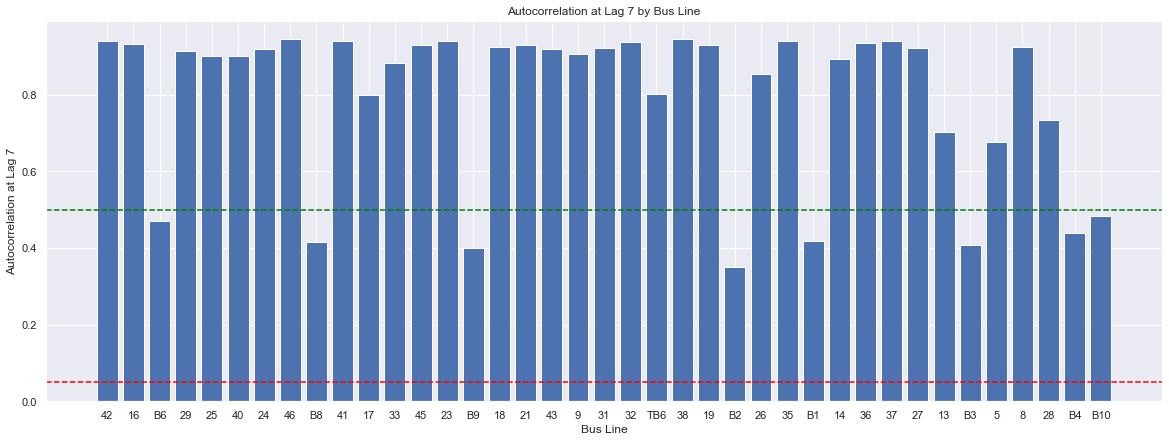

In [843]:
x = list(autocorr_dict.keys())
y = list(autocorr_dict.values())
plt.figure(figsize =(20,7))
plt.bar(x, y)
plt.title('Autocorrelation at Lag 7 by Bus Line')
plt.xlabel('Bus Line')
plt.ylabel('Autocorrelation at Lag 7')
plt.axhline(y=0.5, color='green', linestyle='--', label='Threshold')
plt.axhline(y=0.05, color='red', linestyle='--', label='Threshold')

plt.show()

### On remaque que tous les bus de nuit ont une correlation très faible et presque nulle relativement à une semaine de cela

Nous allons donc separer notre data set pour la suite


In [616]:
day = data[data.lineType == 'daily']
night = data[data.lineType == 'daily']

day.drop('lineType', axis =1, inplace = True)
night.drop('lineType', axis =1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7784\3073686517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day.drop('lineType', axis =1, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_7784\3073686517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night.drop('lineType', axis =1, inplace = True)


### Tendance et flow

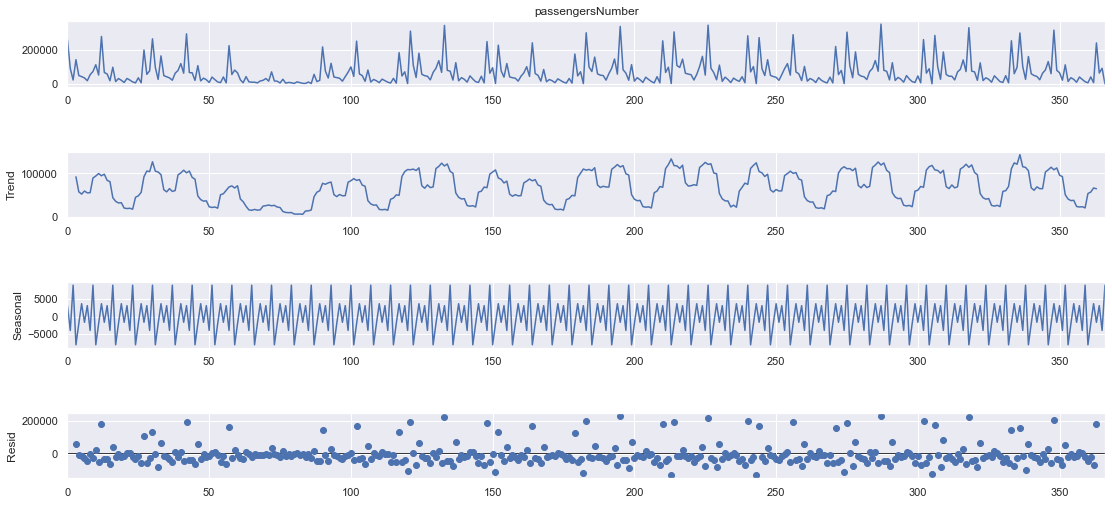

In [617]:
day_month = day.groupby(["month", "line"]).sum().reset_index()

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(day_month['passengersNumber'], model='additive', period = 7)
fig = decompose.plot()
fig.set_size_inches(18, 8)
plt.show()

On remarque que avec la tendance nous avons un pattern que suit le nombre de passager pour l'ensemble des bus: Nous pour ce faire
ajouter deux nouvelle colonne 

 - *previous_week_passenger* qui represente le nombre de passager une semaine de cela
 - *isweek* pour dire si le jour est un weekend of non

## Suppression de doublons et nouveau dataFrame df1

In [618]:
def suppr_double(df):
    df1 = pd.DataFrame()
    bus_line = df.line.unique()
    for line in bus_line:
        df2=df.loc[df.line==line, :][~df.loc[df.line==line, :].index.duplicated() == True]
        df1 = pd.concat([df1, df2])
    return df1
df1 = suppr_double(day)
day = df1.copy()

In [619]:
day

,passengersNumber,line,month
dateTime,,,
2019-04-05,1384.0,36,4
2019-04-06,926.0,36,4
2019-04-07,476.0,36,4
2019-04-08,1417.0,36,4
2019-04-10,1336.0,36,4
...,...,...,...
2020-03-03,3926.0,14,3
2020-03-04,3685.0,14,3
2020-03-05,3195.0,14,3


In [620]:
day['date'] = day.index

In [621]:
df1

,passengersNumber,line,month
dateTime,,,
2019-04-05,1384.0,36,4
2019-04-06,926.0,36,4
2019-04-07,476.0,36,4
2019-04-08,1417.0,36,4
2019-04-10,1336.0,36,4
...,...,...,...
2020-03-03,3926.0,14,3
2020-03-04,3685.0,14,3
2020-03-05,3195.0,14,3


## Verification de la suppression

In [622]:
def chek_double(df):
    k = 0
    for line in bus_line:
        if df[df.line==line].index.duplicated().any():
            k = k+1
    print(f'nombre de doublons : {k}')
    
chek_double(df1)

nombre de doublons : 0


## translation de donnée

In [623]:
for line in bus_line:
   df1.loc[df1.line==line, 'passengersNumber'] = df1.loc[df1.line==line,'passengersNumber' ].shift(periods = 7, freq='D')

In [624]:
df1[df1.index <'2020-03-08']

,passengersNumber,line,month
dateTime,,,
2019-04-05,NaN,36,4
2019-04-06,NaN,36,4
2019-04-07,NaN,36,4
2019-04-08,NaN,36,4
2019-04-10,NaN,36,4
...,...,...,...
2020-03-03,3831.0,14,3
2020-03-04,4138.0,14,3
2020-03-05,4380.0,14,3


## remplacer les NaN par la valeur moyenne

In [625]:
def impute_mean (df, impute_col, filter_col):
    for g in df[filter_col].unique():
        df.loc[(df[filter_col] == g) & (df[impute_col].isnull()), impute_col] = np.mean(df[impute_col][df[filter_col]==g])

In [626]:
impute_mean(df1, 'passengersNumber','line')

In [627]:
df1 = df1.rename(columns={'passengersNumber': 'previous_week_passnger'})

df1

,previous_week_passnger,line,month
dateTime,,,
2019-04-05,1184.151203,36,4
2019-04-06,1184.151203,36,4
2019-04-07,1184.151203,36,4
2019-04-08,1184.151203,36,4
2019-04-10,1184.151203,36,4
...,...,...,...
2020-03-03,3831.000000,14,3
2020-03-04,4138.000000,14,3
2020-03-05,4380.000000,14,3


In [628]:
day = pd.merge(day, df1, on=['dateTime', 'line', 'month'], how='left')

In [629]:
day

,passengersNumber,line,month,date,previous_week_passnger
dateTime,,,,,
2019-04-05,1384.0,36,4,2019-04-05,1184.151203
2019-04-06,926.0,36,4,2019-04-06,1184.151203
2019-04-07,476.0,36,4,2019-04-07,1184.151203
2019-04-08,1417.0,36,4,2019-04-08,1184.151203
2019-04-10,1336.0,36,4,2019-04-10,1184.151203
...,...,...,...,...,...
2020-03-03,3926.0,14,3,2020-03-03,3831.000000
2020-03-04,3685.0,14,3,2020-03-04,4138.000000
2020-03-05,3195.0,14,3,2020-03-05,4380.000000


## creation de isweekend

In [630]:
day['is_weekend'] = (day['date'].dt.dayofweek >= 5).astype(int)
day

,passengersNumber,line,month,date,previous_week_passnger,is_weekend
dateTime,,,,,,
2019-04-05,1384.0,36,4,2019-04-05,1184.151203,0
2019-04-06,926.0,36,4,2019-04-06,1184.151203,1
2019-04-07,476.0,36,4,2019-04-07,1184.151203,1
2019-04-08,1417.0,36,4,2019-04-08,1184.151203,0
2019-04-10,1336.0,36,4,2019-04-10,1184.151203,0
...,...,...,...,...,...,...
2020-03-03,3926.0,14,3,2020-03-03,3831.000000,0
2020-03-04,3685.0,14,3,2020-03-04,4138.000000,0
2020-03-05,3195.0,14,3,2020-03-05,4380.000000,0


In [631]:
line5 = day[day.line == '25']

## evolution en passengersNumber et previous_week_passnger

<Figure size 1080x504 with 0 Axes>

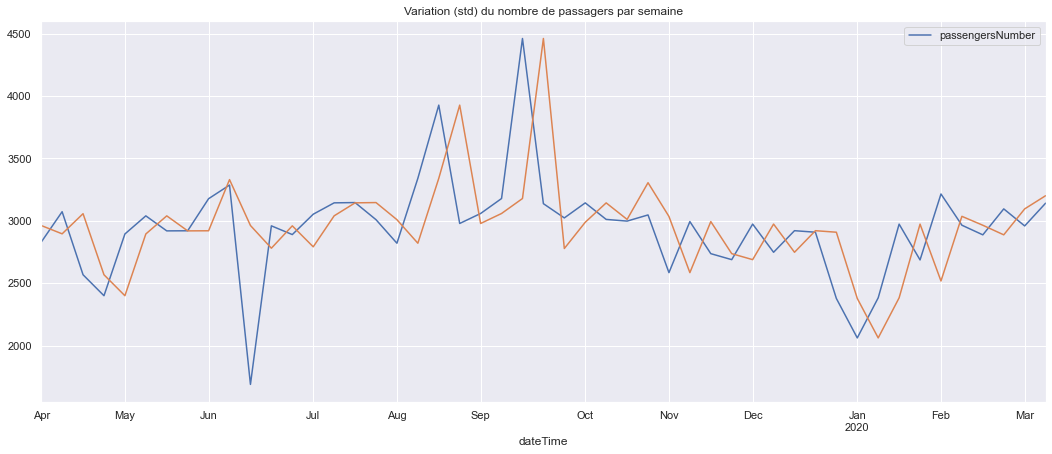

In [632]:
cols = ['passengersNumber']
plt.figure(figsize=(15, 7))
line5[cols].resample("W").mean().plot(title="Variation (std) du nombre de passagers par semaine", figsize=(18, 7), kind="line")
line5['previous_week_passnger'].resample("W").mean().plot(title="Variation (std) du nombre de passagers par semaine", figsize=(18, 7), kind="line")
plt.show()

In [633]:
chek_double(day)

nombre de doublons : 0


## Forecasting

In [634]:
day

,passengersNumber,line,month,date,previous_week_passnger,is_weekend
dateTime,,,,,,
2019-04-05,1384.0,36,4,2019-04-05,1184.151203,0
2019-04-06,926.0,36,4,2019-04-06,1184.151203,1
2019-04-07,476.0,36,4,2019-04-07,1184.151203,1
2019-04-08,1417.0,36,4,2019-04-08,1184.151203,0
2019-04-10,1336.0,36,4,2019-04-10,1184.151203,0
...,...,...,...,...,...,...
2020-03-03,3926.0,14,3,2020-03-03,3831.000000,0
2020-03-04,3685.0,14,3,2020-03-04,4138.000000,0
2020-03-05,3195.0,14,3,2020-03-05,4380.000000,0


### Data spliting

In [635]:
train = day[day['date'] < pd.to_datetime("2019-11-30")]
test = day[day['date'] >= pd.to_datetime("2019-11-30")]
# group the data by month and line

# train_month = train[train.line == '5'].groupby(["month", "line"]).sum().reset_index()
# test_month = test[test.line == '5'].groupby(["month", "line"]).sum().reset_index()

In [636]:

# plt.figure(figsize=(18,7))
# sns.lineplot(data=train_month, x="month", y="passengersNumber", hue="line")
# sns.lineplot(data=test_month, x="month", y="passengersNumber", hue="line")

# plt.xticks(range(12), calendar.month_name[1:13], rotation=45)
# plt.show()

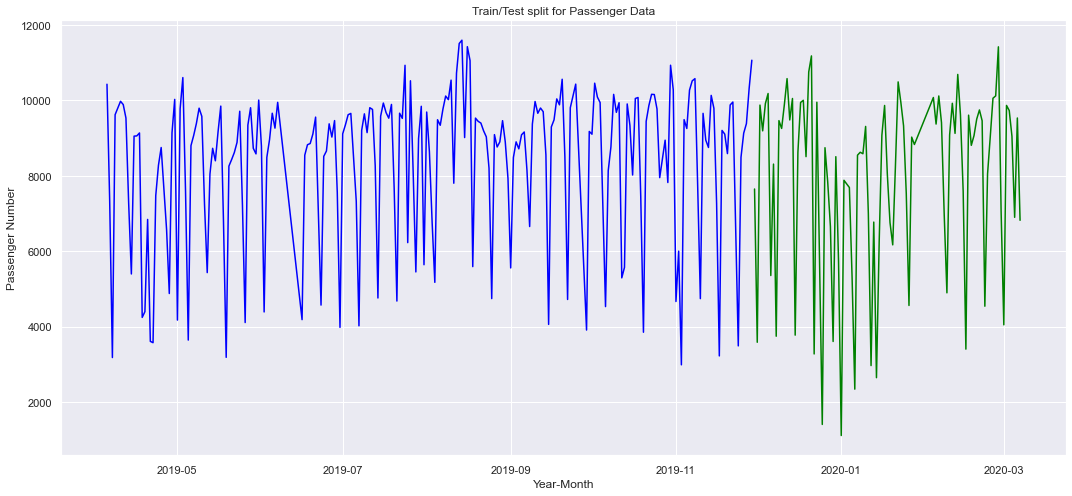

In [637]:
plt.figure(figsize=(18,8))
plt.plot(train.loc[train.line == '5', 'date'], train.loc[train.line == '5', 'passengersNumber'], color='blue')
plt.plot(test.loc[test.line == '5', 'date'], test.loc[test.line == '5', 'passengersNumber'], color='green')
# plt.plot(test['date'], test.passengersNumber, color='green')
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

les données d'entrainement en blue et ceux de teste en vert

## scaling and on hote

In [638]:
def scaling(df):
    scaler = MinMaxScaler()
    for line in day.line.unique():
        mask = df.line == line
        df.loc[mask, "passengersNumber"] = scaler.fit_transform(df.loc[mask, "passengersNumber"].values.reshape(-1,1))
        df.loc[mask, "previous_week_passnger"] = scaler.fit_transform(df.loc[mask, "previous_week_passnger"].values.reshape(-1,1))
scaling(day)

In [639]:
day

,passengersNumber,line,month,date,previous_week_passnger,is_weekend
dateTime,,,,,,
2019-04-05,0.750524,36,4,2019-04-05,0.610867,0
2019-04-06,0.430468,36,4,2019-04-06,0.610867,1
2019-04-07,0.116003,36,4,2019-04-07,0.610867,1
2019-04-08,0.773585,36,4,2019-04-08,0.610867,0
2019-04-10,0.716981,36,4,2019-04-10,0.610867,0
...,...,...,...,...,...,...
2020-03-03,0.706989,14,3,2020-03-03,0.682846,0
2020-03-04,0.645743,14,3,2020-03-04,0.760864,0
2020-03-05,0.521220,14,3,2020-03-05,0.822363,0


# Model ARIMA

In [640]:
day

,passengersNumber,line,month,date,previous_week_passnger,is_weekend
dateTime,,,,,,
2019-04-05,0.750524,36,4,2019-04-05,0.610867,0
2019-04-06,0.430468,36,4,2019-04-06,0.610867,1
2019-04-07,0.116003,36,4,2019-04-07,0.610867,1
2019-04-08,0.773585,36,4,2019-04-08,0.610867,0
2019-04-10,0.716981,36,4,2019-04-10,0.610867,0
...,...,...,...,...,...,...
2020-03-03,0.706989,14,3,2020-03-03,0.682846,0
2020-03-04,0.645743,14,3,2020-03-04,0.760864,0
2020-03-05,0.521220,14,3,2020-03-05,0.822363,0


In [647]:
line_data = day.loc[(day['line'] == line) , 'passengersNumber']
line_data.index = pd.to_datetime(line_data.index)

train = line_data[:'2019-11-30']
test = line_data['2019-11-30':]

In [674]:
day.columns

Index(['passengersNumber', 'line', 'month', 'date', 'previous_week_passnger',
       'is_weekend'],
      dtype='object')

In [708]:
day

,passengersNumber,line,month,date,previous_week_passnger,is_weekend
dateTime,,,,,,
2019-04-05,0.750524,36,4,2019-04-05,0.610867,0
2019-04-06,0.430468,36,4,2019-04-06,0.610867,1
2019-04-07,0.116003,36,4,2019-04-07,0.610867,1
2019-04-08,0.773585,36,4,2019-04-08,0.610867,0
2019-04-10,0.716981,36,4,2019-04-10,0.610867,0
...,...,...,...,...,...,...
2020-03-03,0.706989,14,3,2020-03-03,0.682846,0
2020-03-04,0.645743,14,3,2020-03-04,0.760864,0
2020-03-05,0.521220,14,3,2020-03-05,0.822363,0


In [753]:
line_data = day.loc[(day['line'] == line), 'passengersNumber']
train = line_data[:'2020-03-01']
a =scaler.inverse_transform(test_values)
a[0]

array([ 622.73584906,  186.24528302,  978.09433962,  969.98113208,
        802.03773585, 1037.32075472,  144.86792453,  512.39622642,
         69.41509434,  916.43396226,  980.52830189, 1000.81132075,
       1031.64150943,  727.39622642,  712.79245283,  163.52830189,
        966.73584906,  909.94339623, 1078.69811321,  923.73584906,
       1054.35849057,  864.50943396,  164.33962264, 1077.0754717 ,
        774.45283019,   11.        ,  520.50943396,  831.24528302,
        599.20754717,   95.37735849,  890.47169811,  649.50943396,
         14.24528302,  904.26415094,  924.54716981,  531.05660377,
        256.01886792,  146.49056604,  920.49056604,  982.1509434 ,
        885.60377358,  963.49056604,  465.33962264,  128.64150943,
        893.71698113,   48.32075472,  963.49056604, 1006.49056604,
        982.1509434 ,  651.94339623,  220.32075472,  279.54716981,
        825.56603774, 1038.94339623, 1019.47169811,  938.33962264,
        522.13207547,  131.88679245,  912.37735849,  945.64150

In [766]:
day

,passengersNumber,line,month,date,previous_week_passnger,is_weekend
dateTime,,,,,,
2019-04-05,0.750524,36,4,2019-04-05,0.610867,0
2019-04-06,0.430468,36,4,2019-04-06,0.610867,1
2019-04-07,0.116003,36,4,2019-04-07,0.610867,1
2019-04-08,0.773585,36,4,2019-04-08,0.610867,0
2019-04-10,0.716981,36,4,2019-04-10,0.610867,0
...,...,...,...,...,...,...
2020-03-03,0.706989,14,3,2020-03-03,0.682846,0
2020-03-04,0.645743,14,3,2020-03-04,0.760864,0
2020-03-05,0.521220,14,3,2020-03-05,0.822363,0


In [785]:
day

,passengersNumber,line,month,date,previous_week_passnger,is_weekend
dateTime,,,,,,
2019-04-05,0.750524,36,4,2019-04-05,0.610867,0
2019-04-06,0.430468,36,4,2019-04-06,0.610867,1
2019-04-07,0.116003,36,4,2019-04-07,0.610867,1
2019-04-08,0.773585,36,4,2019-04-08,0.610867,0
2019-04-10,0.716981,36,4,2019-04-10,0.610867,0
...,...,...,...,...,...,...
2020-03-03,0.706989,14,3,2020-03-03,0.682846,0
2020-03-04,0.645743,14,3,2020-03-04,0.760864,0
2020-03-05,0.521220,14,3,2020-03-05,0.822363,0


c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


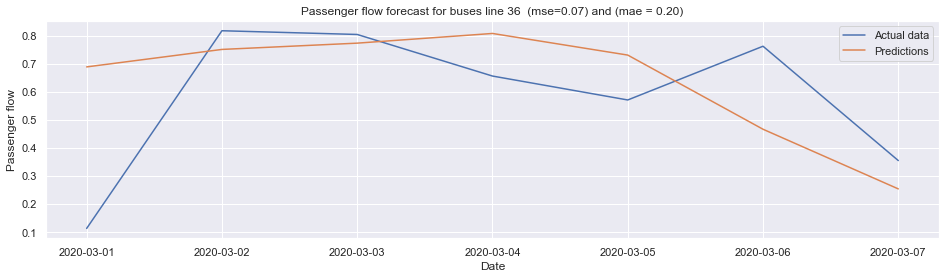

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\anaconda3\lib\si

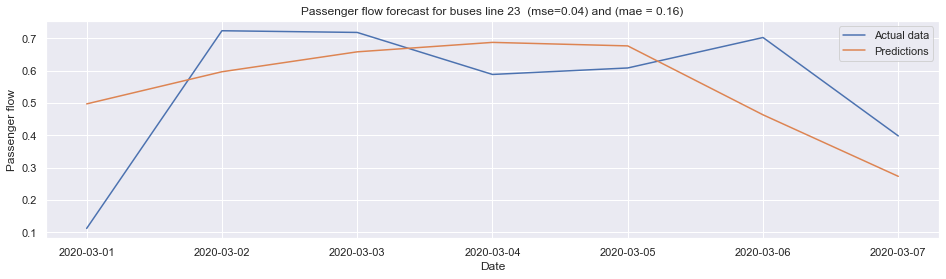

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP\anacond

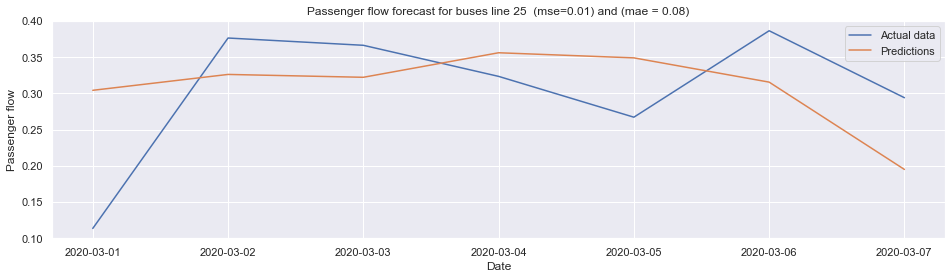

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


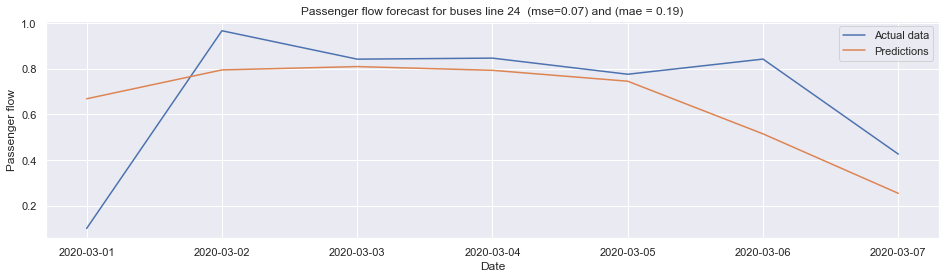

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


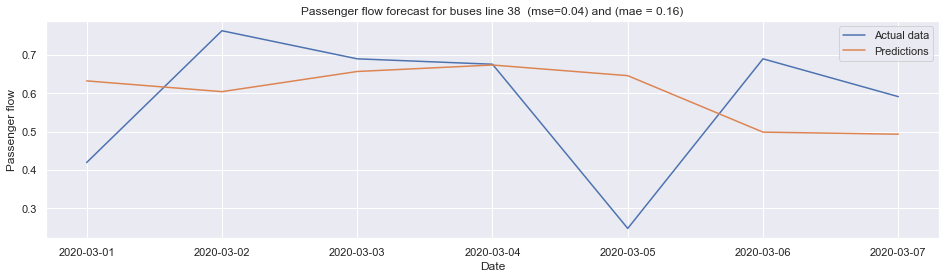

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


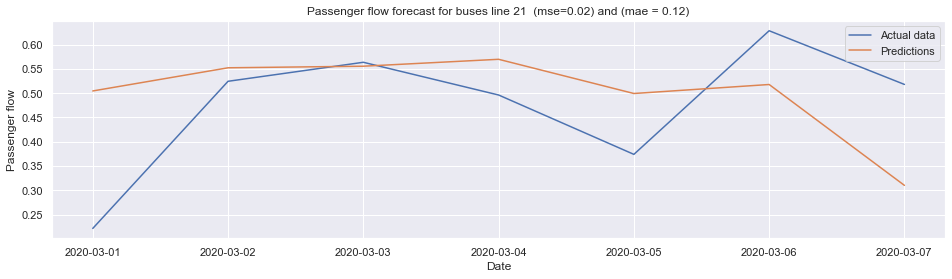

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


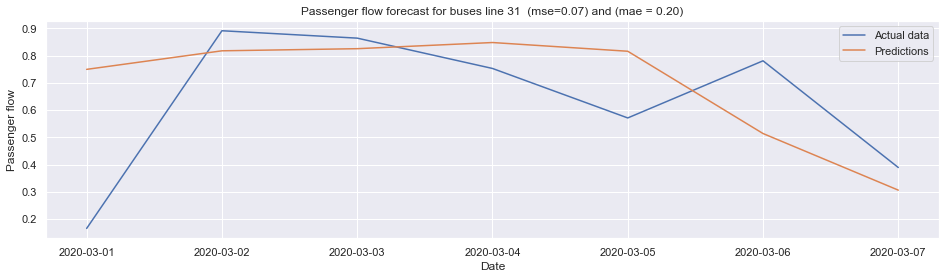

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


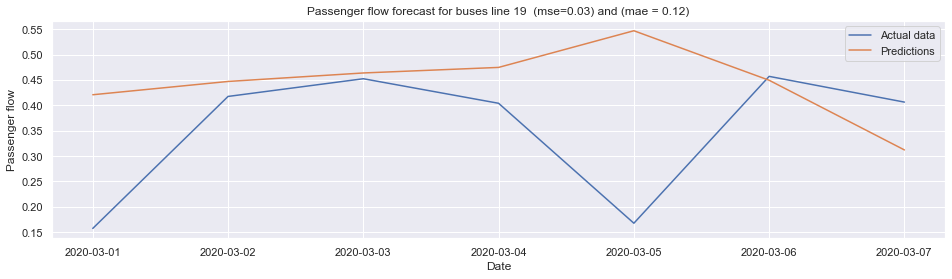

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


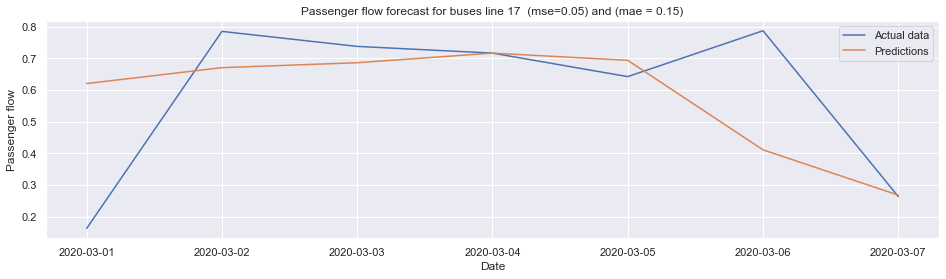

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\anaconda3\lib\si

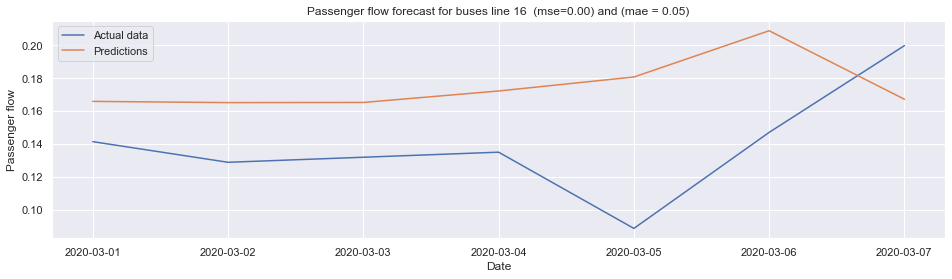

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


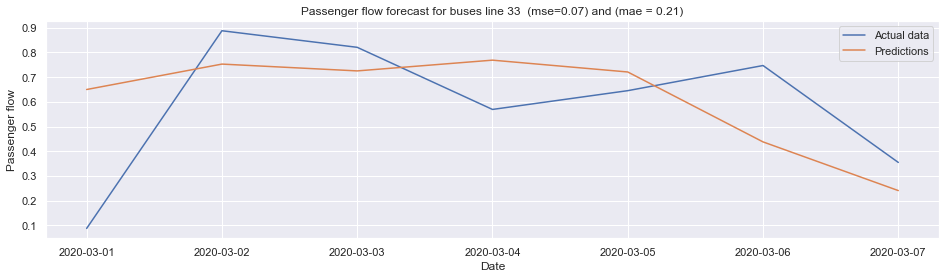

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\anaconda3\lib\si

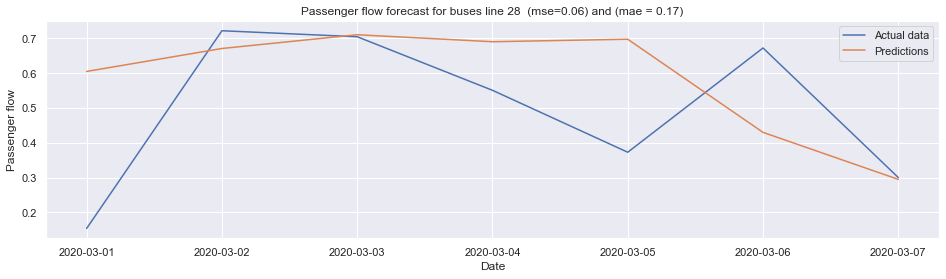

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


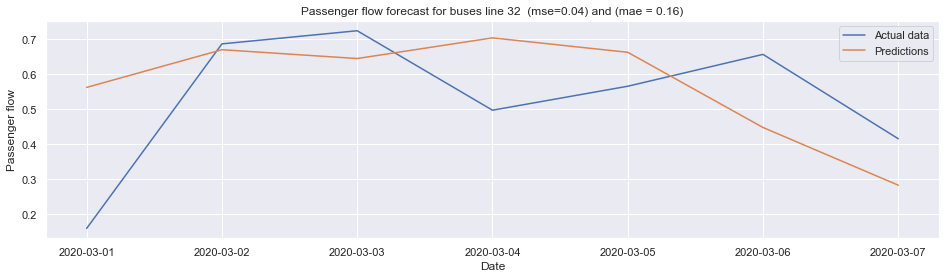

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


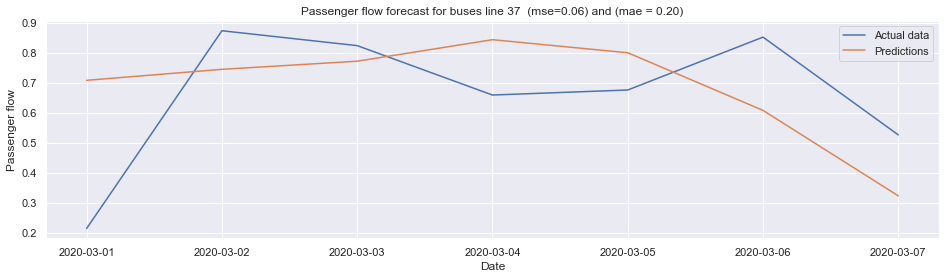

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


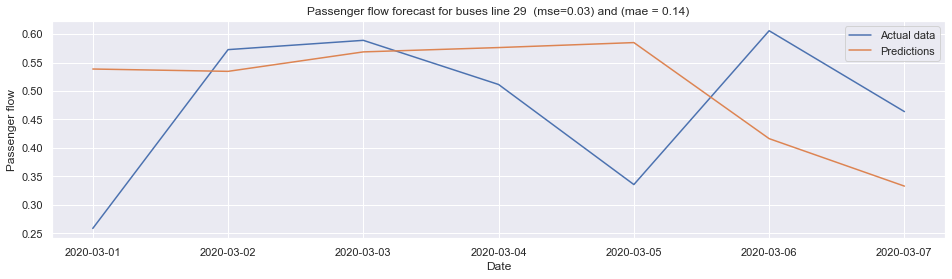

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


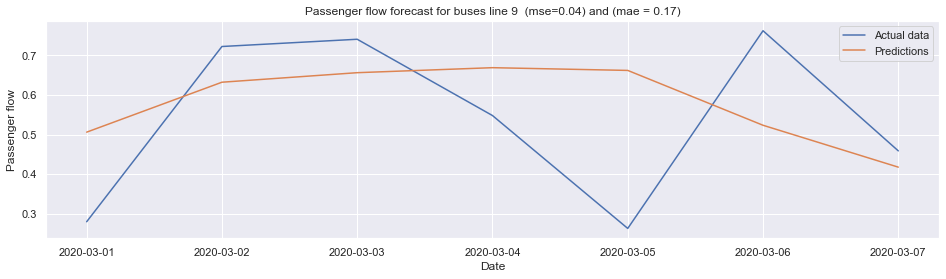

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: Prediction must have `end` after `start`.

In [783]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

from pmdarima.arima import auto_arima

#  exog=train[['is_weekend', 'previous_week_passenger', 'month']],

global_error_mse = []
global_error_mae = []
# Loop over all unique values in the "line" column
bus_line = day['line'].unique()
for line in bus_line:
    # Loop over all unique values in the "lineType" column
    # Create a time series with the number of passengers for the selected line and line type
    line_data = day.loc[(day['line'] == line), 'passengersNumber']
    line_data.index = pd.to_datetime(line_data.index)

    train = line_data[:'2020-03-01']
    test = line_data['2020-03-01':]
    
    # Hyperparamters
    
    model = auto_arima(train, seasonal=True, m=7) 
    p, d, q = model.order
    P, D, Q, S = model.seasonal_order
    
    # Fit an ARIMA model to the training data
    model = sm.tsa.ARIMA(train,order=(p, d, q), seasonal_order=(P, D, Q, S))
    model_fit = model.fit()
    
    # Make predictions for the test data
    forecast = model_fit.forecast(steps=len(test))
    start_index = day.index.min()
    end_index = test.index.max()
    # forecast = model_fit.forcast(start=start_index, end=end_index)
    # forecast = scaler.inverse_transform(forecast.reshape(-1, 1))
    # print(forecast)
    # forecast = scaler.inverse_transform(forecast.reshape(1,-1))
    # forecast_values = forecast.to_numpy().reshape(-1, 1)

    
    # Calculate the mean absolute error (MAE) of the predictions
    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    
    global_error_mae.append(mae)
    global_error_mse.append(mse)

    # test_values = test.values.reshape(1,-1)
    
    # Plot the actual and predicted values

    plt.figure(figsize=(16,4))
    # plt.plot(test.index.sort_values(), scaler.inverse_transform(test_values)[0], label='Actual data')
    plt.plot(test.index, test, label='Actual data')
    plt.plot(test.index, forecast, label='Predictions')
    plt.title(f'Passenger flow forecast for buses line {line}  (mse={mse:.2f}) and (mae = {mae:.2f})')
    plt.xlabel('Date')
    plt.ylabel('Passenger flow')
    plt.legend()
    plt.show()
    # break
  

In [784]:
global_mse = np.mean(np.array(global_error_mse))
global_mae = np.mean(np.array(global_error_mae))

print(f'global MSE {global_mse}')
print(f'global MAE {global_mae}')

global MSE 0.04394482835377618
global MAE 0.15551342987064692


In [782]:
# print(global_error_mse)

[]


In [732]:
import tensorflow as tf

In [715]:
def create_dataset(X_features, y_target, time_steps = 10):
    Xs = []
    ys = []
    for i in range(len(X_features) - time_steps):
        v = X_features.iloc[i: (i + time_steps)].values
        Xs.append(v)
        ys.append(y_target.iloc[i+time_steps])
    return np.array(Xs),np.array(ys)